<a href="https://colab.research.google.com/github/Youcheng9/Pytorch_Deep_Learning00-09/blob/main/pytorch03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(f"Pytorch version: {torch.__version__}")
print(f"Torchvision version: {torchvision.__version__}")

Pytorch version: 2.8.0+cu126
Torchvision version: 0.23.0+cu126


In [ ]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 203kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.79MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.5MB/s]


In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
classes_names = train_data.classes
classes_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image Shape: torch.Size([1, 28, 28])


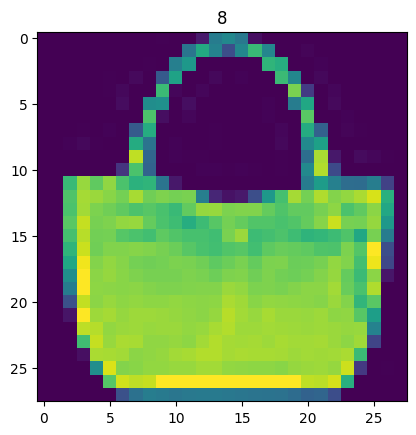

In [ ]:
image, label = train_data[100]
print(f"Image Shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);

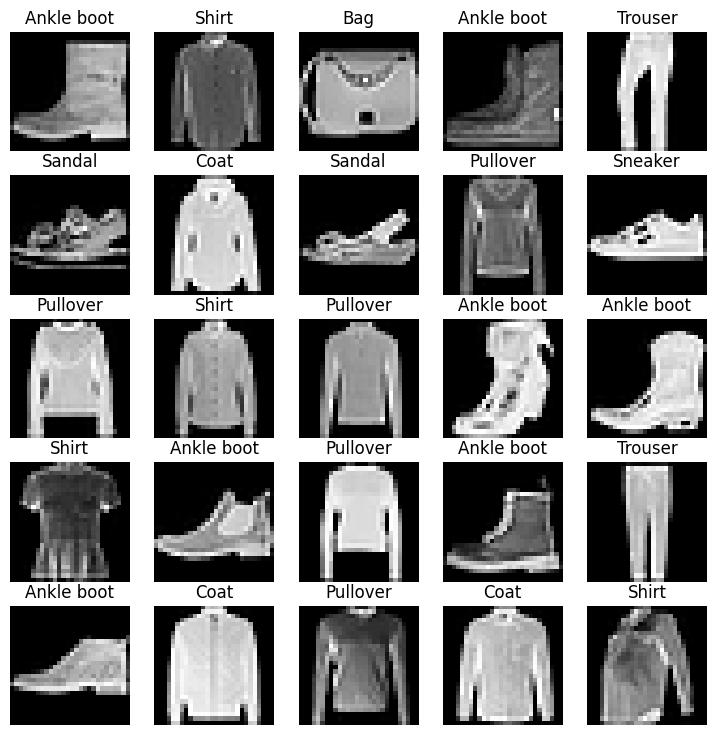

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 5, 5
for i in range(0, rows * cols):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(classes_names[label])
    plt.axis(False);

In [ ]:
from torch.utils.data import DataLoader


batch_size = 64

train_dataloader = DataLoader(train_data, batch_size, shuffle = True)

test_dataloader = DataLoader(test_data, batch_size, shuffle = False)

print(len(train_dataloader), len(test_dataloader))

938 157


Train features: torch.Size([64, 1, 28, 28])
Train labels: torch.Size([64])


Text(0.5, 1.0, 'Bag')

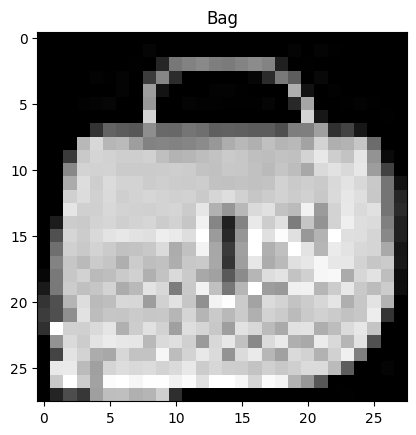

In [ ]:
train_features, train_labels = next(iter(train_dataloader))

print(f"Train features: {train_features.shape}")
print(f"Train labels: {train_labels.shape}")

img = train_features[0].squeeze()
label = train_labels[0]

plt.imshow(img, cmap="gray")
plt.title(classes_names[label])


In [ ]:
flatten_model = nn.Flatten()

x = train_features[0]

output = flatten_model(x)

print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

# print(x)
# print(output)

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [ ]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )
  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

model0 = FashionMNISTModelV0(input_shape = 784, hidden_units = 10, output_shape=len(classes_names))

model0.to("cpu")

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model0.parameters(), lr=0.1)

In [ ]:
# def accuracy(y_true, y_pred):
#   correct = torch.eq(y_true, y_pred).sum().item()

#   acc = (correct / len(y_pred)) * 100

#   return acc

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_loss = 0

  for batch, (X, y) in enumerate(train_dataloader):
    model0.train()

    y_pred = model0(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss /=len(train_dataloader)

  test_loss, test_acc = 0, 0

  model0.eval()

  with torch.inference_mode():
    for X, y in test_dataloader:
      test_pred = model0(X)

      test_loss += loss_fn(test_pred, y)

      test_acc += accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}")

train_time_end_on_cpu = timer()
total_train_time_on_cpu = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device="cpu")


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Looked at 0/60000 samples
Looked at 25600/60000 samples
Looked at 51200/60000 samples

Train loss: 0.63283 | Test loss: 0.53455, Test acc: 80.99
Epoch: 1
---------
Looked at 0/60000 samples
Looked at 25600/60000 samples
Looked at 51200/60000 samples

Train loss: 0.48359 | Test loss: 0.49770, Test acc: 82.21
Epoch: 2
---------
Looked at 0/60000 samples
Looked at 25600/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45528 | Test loss: 0.49217, Test acc: 82.92
Train time on cpu: 32.471 seconds


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  loss, acc = 0, 0

  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model name": model.__class__.__name__,
          "model loss": loss.item(),
          "model acc": acc}


model0_result = eval_model(model=model0,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn)
model0_result

{'model name': 'FashionMNISTModelV0',
 'model loss': 0.49216505885124207,
 'model acc': 82.921974522293}

##Model with non-linear and linear layers


In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )
  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model1 = FashionMNISTModelV1(input_shape = 784, hidden_units = 10, output_shape = len(classes_names)).to(device)
next(model1.parameters()).device

device(type='cuda', index=0)

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model1.parameters(), lr=0.1)

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  train_loss, train_acc = 0, 0
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"train_loss: {train_loss} | train_acc: {train_acc}")


def test_step(data_loader: torch.utils.data.DataLoader,
                model: torch.nn.Module,
                loss_fn: torch.nn.Module,
                accuracy_fn,
                device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()

    with torch.inference_mode():
      for X, y in data_loader:
        X, y = X.to(device), y.to(device)
        test_pred = model(X)


        test_loss += loss_fn(test_pred, y)
        test_acc += accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim=1))

      test_loss /= len(data_loader)
      test_acc /= len(data_loader)
      print(f"test_loss: {test_loss} | test_acc: {test_acc}")

In [ ]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_on_cpu


epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(data_loader=train_dataloader,
             model=model1,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn)
  test_step(data_loader=test_dataloader,
            model=model1,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)

train_time_end_on_gpu = timer()
total_train_time_on_gpu = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
train_loss: 1.1277352571487427 | train_acc: 60.63599413646055
test_loss: 0.9521824717521667 | test_acc: 65.17714968152866
Epoch: 1
---------
train_loss: 0.9342427849769592 | train_acc: 65.77658582089552
test_loss: 0.9310975670814514 | test_acc: 66.22213375796179
Epoch: 2
---------
train_loss: 0.8942506909370422 | train_acc: 66.88266257995735
test_loss: 0.8932226896286011 | test_acc: 66.7296974522293
Train time on cuda: 32.471 seconds


In [ ]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  loss, acc = 0, 0

  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model name": model.__class__.__name__,
          "model loss": loss.item(),
          "model acc": acc}


model1_result = eval_model(model=model1,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn,
                           device=device)
model1_result

{'model name': 'FashionMNISTModelV1',
 'model loss': 0.8932226896286011,
 'model acc': 66.7296974522293}

In [ ]:
model0_result

{'model name': 'FashionMNISTModelV0',
 'model loss': 0.49216505885124207,
 'model acc': 82.921974522293}

In [ ]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape, out_channels = hidden_units, kernel_size = 3, padding = 1, stride = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, padding = 1, stride = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 0)
    )

    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, padding = 1, stride = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, padding = 1, stride =1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 0)
    )
    self.classfier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = 490, out_features = 10, bias = True)
    )

  def forward(self, x):
    x = self.block_1(x)
    x = self.block_2(x)
    x = self.classfier(x)

    return x

torch.manual_seed(42)
model2 = FashionMNISTModelV2(input_shape = 1, hidden_units = 10, output_shape = len(classes_names)). to(device)
model2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classfier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)



images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0
                       )


conv_layer(test_image)

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

tensor([[[-2.8778e-01, -6.0596e-02, -5.6306e-02,  ...,  2.8654e-01,
           6.6224e-01, -2.3216e-01],
         [-9.8911e-01, -4.0099e-01,  4.1832e-01,  ...,  4.7459e-01,
          -1.8552e-01, -5.7622e-01],
         [-4.1340e-02, -2.3277e-01,  3.7418e-01,  ...,  2.8255e-02,
           1.4923e-01,  1.4236e-01],
         ...,
         [-8.0374e-01, -7.6687e-01, -5.9457e-02,  ...,  1.7452e-01,
           4.2594e-01, -4.8341e-01],
         [-1.4512e-01, -1.1566e-01,  6.1783e-01,  ...,  2.4126e-01,
          -3.6626e-01,  3.5645e-01],
         [ 3.6096e-02,  1.5214e-01,  2.3123e-01,  ...,  3.0904e-01,
          -4.9680e-01, -7.2258e-01]],

        [[-1.0853e+00, -1.6079e+00,  1.3346e-01,  ...,  2.1698e-01,
          -1.7643e+00,  2.5263e-01],
         [-8.2507e-01,  6.3866e-01,  1.8845e-01,  ..., -1.0936e-01,
           4.8068e-01,  8.4869e-01],
         [ 6.4927e-01, -4.2061e-03, -4.9991e-01,  ...,  5.8356e-01,
           2.4611e-01,  6.6233e-01],
         ...,
         [ 9.8860e-02,  1

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model2.parameters(), lr = 0.1)


In [ ]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs = 3

for epoch in range(epochs):
  print(f"Epoch: {epoch}\n---------")
  train_step(data_loader = train_dataloader,
             model = model2,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)
  test_step(data_loader = test_dataloader,
            model = model2,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

  train_time_end_model_2 = timer()
  total_train_time_model_2 = print_train_time(start = train_time_start_model_2, end = train_time_end_model_2, device = device)

Epoch: 0
---------
train_loss: 0.8097726106643677 | train_acc: 70.48074360341151
test_loss: 0.4697991609573364 | test_acc: 83.25039808917198
Train time on cuda: 10.458 seconds
Epoch: 1
---------
train_loss: 0.39875948429107666 | train_acc: 85.70595682302772
test_loss: 0.38612449169158936 | test_acc: 85.91759554140127
Train time on cuda: 20.711 seconds
Epoch: 2
---------
train_loss: 0.34781646728515625 | train_acc: 87.44003198294243
test_loss: 0.3687360882759094 | test_acc: 86.5047770700637
Train time on cuda: 35.307 seconds


In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model0_result, model1_result, model2_result])
compare_results

,model name,model loss,model acc
0,FashionMNISTModelV0,0.492165,82.921975
1,FashionMNISTModelV1,0.893223,66.729697
2,FashionMNISTModelV2,0.368736,86.504777


In [ ]:
coompare_results =[total_train_time_on_cpu, total_train_time_on_gpu, total_train_time_model_2]
compare_results["train_time"] = coompare_results
compare_results

,model name,model loss,model acc,train_time
0,FashionMNISTModelV0,0.492165,82.921975,32.471411
1,FashionMNISTModelV1,0.893223,66.729697,32.471411
2,FashionMNISTModelV2,0.368736,86.504777,35.306779


In [ ]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim = 0).to(device)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      pred_probs.append(pred_prob)

  return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)


print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({classes_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [ ]:
pred_probs = make_predictions(model = model2, data = test_samples, device = device)


pred_probs[:2]


tensor([[5.9780e-07, 4.7852e-07, 4.6472e-08, 4.5093e-08, 1.6522e-07, 9.9890e-01,
         5.9283e-06, 7.4119e-06, 1.2617e-05, 1.0715e-03],
        [5.2025e-02, 2.3675e-01, 1.4215e-03, 6.5752e-01, 1.0195e-02, 4.0734e-04,
         4.0489e-02, 3.0413e-04, 8.7446e-04, 1.7269e-05]], device='cuda:0')

In [ ]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 3, 7, 4, 3, 0, 4, 7, 1], device='cuda:0')

In [ ]:
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1],
 tensor([5, 3, 7, 4, 3, 0, 4, 7, 1], device='cuda:0'))

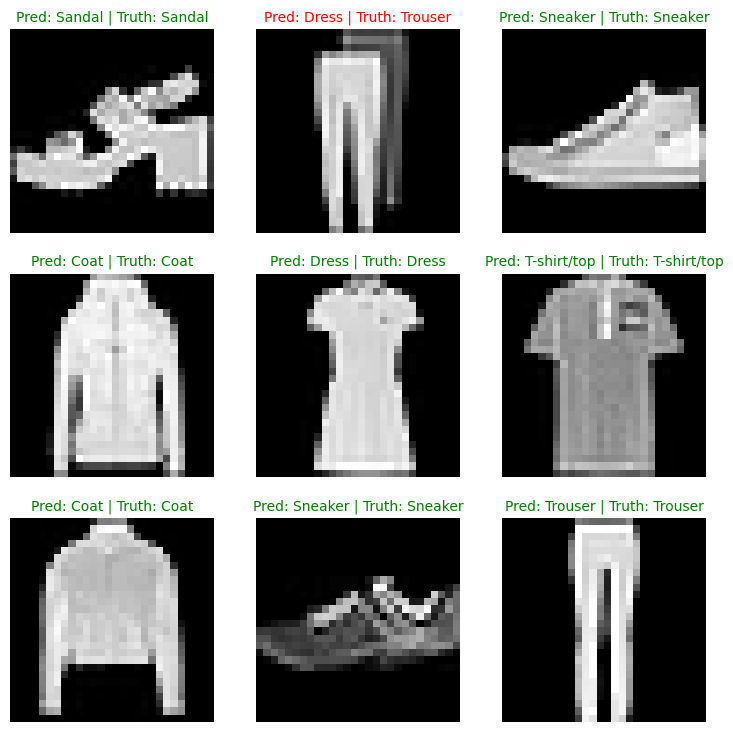

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = classes_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = classes_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

In [ ]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [ ]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                    hidden_units=10, # try changing this to 128 and seeing what happens
                                    output_shape=10)

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model name': 'FashionMNISTModelV2',
 'model loss': 0.3687360882759094,
 'model acc': 86.5047770700637}

In [ ]:
model2_result

{'model name': 'FashionMNISTModelV2',
 'model loss': 0.3687360882759094,
 'model acc': 86.5047770700637}

In [ ]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model2_result["model loss"]),
              torch.tensor(loaded_model_2_results["model loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)